<!--# STAT 207: Data Science Exploration-->
# <u>Case Study 18</u>: Variable Selection for Linear Regression Models

In this Case Study, we will explore variable selection options that we have for linear regression models.

Specifically, we will analyze data for predicting breast tumor size using gene expression data.

Chanrion et al. (2008) reported results of a study of 155 patients treated for breast cancer with tamoxofen. The patients were followed for a period of time and diagnosed as having a recurrence of breast cancer (R), or being recurrence free (RF). Various clinical measurements were made including tumor size at the time of treatment. Gene expression was measured for a large number of gene sequences. Here we focus on a sample of 50 gene sequences and study the extent to which these might be predictive of tumor size. 

The data for this example are in two different files:

+ 'clinical_data.csv' contains the clinical measurements and status for the patients in the study

+ 'gene_expr.csv' contains gene expression values for 50 genes



## Preparing the Data

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
clin = pd.read_csv("clinical_data.csv")
clin

,Tumor sample,Status,Patient age (years),Adjuvant therapy,Histological type,SBR Grade,Tumor size (mm),pT (TNM),Lymph node checked,N+,...,ER,PR,Follow-up period (months),Local recurrence,Distant metastases,Time before recurrence (months),State of health,Death cause,Decease delay upon recurrence (months),Decease delay after surgery (months)
0,EB5012,RF,75.6,X-ray + Tam,IDC,2.0,13.0,pT1,15,3.0,...,460,28,68.5,NaN,NaN,NaN,deceased,other cause,NaN,68.5
1,EB5015,RF,55.3,X-ray + Tam,IDC,1.0,15.0,pT1,22,1.0,...,39,80,99.9,NaN,NaN,NaN,alive,NaN,NaN,NaN
2,EB5018,RF,64.4,X-ray + Tam,IDC,2.0,15.0,pT1,5,1.0,...,26,83,137.5,NaN,NaN,NaN,alive,NaN,NaN,NaN
3,EB5019,RF,55.4,X-ray + Tam,IDC,1.0,20.0,pT2,9,1.0,...,79,143,142.3,NaN,NaN,NaN,alive,NaN,NaN,NaN
4,EB5020,RF,51.1,X-ray + Tam,IDC,1.0,10.0,pT1,10,2.0,...,26,210,167.4,NaN,NaN,NaN,alive,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,VB0488,R,58.9,X-ray+Tam,IDC,2.0,20.0,pT2,3,1.0,...,195,148,44.8,NaN,yes,27.8,deceased,recurrence,17.0,44.8
151,VB0534,R,70.7,X-ray+Tam,ILC,2.0,30.0,pT2,13,0.0,...,29,19,35.5,NaN,yes,26.3,alive with meta,NaN,NaN,NaN
152,VB1099,R,76.5,X-ray+Tam,IDC+ICC,2.0,15.0,pT1,10,9.0,...,253,41,63.8,NaN,yes,39.9,alive with meta,NaN,NaN,NaN
153,VB1165,R,59.9,X-ray+Tam,ILC,2.0,20.0,pT1,13,0.0,...,369,<10,62.2,yes,NaN,45.6,alive with meta,NaN,NaN,NaN


In [3]:
gene = pd.read_csv("gene_expr.csv")
gene

,X159,X960,X980,X986,X1023,X1028,X1064,X1092,X1103,X1109,...,X1563,X1574,X1595,X1597,X1609,X1616,X1637,X1656,X1657,X1683
0,0.739512,1.971036,-1.660842,2.777183,3.299062,-1.954834,2.784970,0.411848,3.974931,-0.979751,...,3.221117,-1.735267,-2.036134,3.114202,-1.567229,-2.100264,-2.067843,2.116261,-2.057195,-0.868534
1,2.037903,2.197854,-1.263034,4.082346,5.426886,-1.732520,3.085890,0.688056,4.503384,-1.185032,...,2.927229,-1.646363,0.127756,2.772590,-1.451107,0.267480,-1.526069,2.643856,-1.625604,-1.415037
2,2.218338,3.471559,-1.789433,2.829994,4.746466,-2.222392,2.977280,0.944858,4.021099,-1.825502,...,3.565945,-2.296393,-2.347923,3.577213,-2.175087,-2.084889,-2.106915,2.738768,-1.387816,-0.780555
3,0.972344,2.638734,-2.010999,3.913935,4.744161,-2.496426,3.139577,0.155651,4.632121,-1.671513,...,3.815160,-1.706846,-2.216318,3.168707,-1.844349,-2.010999,-1.996352,2.797407,-1.743066,-1.010999
4,2.412235,4.033491,-1.536501,4.239650,4.304348,-1.991067,3.700095,0.878536,4.295705,-2.141092,...,4.264107,-2.424026,-2.448274,3.717911,-2.286523,-2.045515,-1.776328,2.813104,-2.353637,-1.687061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.037313,-1.084316,3.636530,0.764423,-0.166778,-0.379772,-1.300045,2.032701,0.473679,3.469135,...,-0.031849,2.531484,2.656651,1.384798,1.094487,2.626363,0.557401,0.935583,1.822574,3.161500
151,1.133431,-0.618910,4.335286,-0.191048,0.128324,0.363812,-0.671377,3.962470,0.406625,3.383235,...,0.512335,3.035897,3.078885,0.948775,1.236700,3.137249,0.661198,0.346325,1.480626,1.664730
152,1.612861,-1.200427,5.036507,-0.074318,-0.353972,-0.393072,-1.172946,2.084975,0.809940,2.818522,...,-0.024350,3.861100,3.932023,2.391455,1.461077,3.947756,0.416546,1.032824,1.608908,3.079987
153,1.204820,-1.413874,4.426671,-0.174298,-0.629302,-0.935110,-2.120142,1.191116,0.567390,2.790792,...,-0.272145,2.330982,2.410664,0.579129,1.039623,2.386818,-0.046142,0.110902,0.640919,2.673042


### Merging Relevant Variables into One Dataframe
Let's merge the gene expression and tumor size dataframes into one dataframe and check for missing values.

In [4]:
# Merge features and target into one dataframe
#
df = gene
df['size'] = clin['Tumor size (mm)']
df.head()

,X159,X960,X980,X986,X1023,X1028,X1064,X1092,X1103,X1109,...,X1574,X1595,X1597,X1609,X1616,X1637,X1656,X1657,X1683,size
0,0.739512,1.971036,-1.660842,2.777183,3.299062,-1.954834,2.784970,0.411848,3.974931,-0.979751,...,-1.735267,-2.036134,3.114202,-1.567229,-2.100264,-2.067843,2.116261,-2.057195,-0.868534,13.0
1,2.037903,2.197854,-1.263034,4.082346,5.426886,-1.732520,3.085890,0.688056,4.503384,-1.185032,...,-1.646363,0.127756,2.772590,-1.451107,0.267480,-1.526069,2.643856,-1.625604,-1.415037,15.0
2,2.218338,3.471559,-1.789433,2.829994,4.746466,-2.222392,2.977280,0.944858,4.021099,-1.825502,...,-2.296393,-2.347923,3.577213,-2.175087,-2.084889,-2.106915,2.738768,-1.387816,-0.780555,15.0
3,0.972344,2.638734,-2.010999,3.913935,4.744161,-2.496426,3.139577,0.155651,4.632121,-1.671513,...,-1.706846,-2.216318,3.168707,-1.844349,-2.010999,-1.996352,2.797407,-1.743066,-1.010999,20.0
4,2.412235,4.033491,-1.536501,4.239650,4.304348,-1.991067,3.700095,0.878536,4.295705,-2.141092,...,-2.424026,-2.448274,3.717911,-2.286523,-2.045515,-1.776328,2.813104,-2.353637,-1.687061,10.0


### Identifying Missing Data

The code below displays whether each entry in the dataframe is NOT a missing value (True) or not (False).

In [5]:
# Check for missing values: display column name 
# for any column with missing values
#
df.notna()

,X159,X960,X980,X986,X1023,X1028,X1064,X1092,X1103,X1109,...,X1574,X1595,X1597,X1609,X1616,X1637,X1656,X1657,X1683,size
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
151,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
152,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
153,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


The code below returns a true if it is the case that ALL entries in each column are not missing values.

In [6]:
df.notna().all()

X159      True
X960      True
X980      True
X986      True
X1023     True
X1028     True
X1064     True
X1092     True
X1103     True
X1109     True
X1124     True
X1136     True
X1141     True
X1144     True
X1169     True
X1173     True
X1179     True
X1193     True
X1203     True
X1206     True
X1208     True
X1219     True
X1232     True
X1264     True
X1272     True
X1292     True
X1297     True
X1329     True
X1351     True
X1362     True
X1416     True
X1417     True
X1418     True
X1430     True
X1444     True
X1470     True
X1506     True
X1514     True
X1529     True
X1553     True
X1563     True
X1574     True
X1595     True
X1597     True
X1609     True
X1616     True
X1637     True
X1656     True
X1657     True
X1683     True
size     False
dtype: bool

Putting this all together, the code below displays only the columns that have at least one missing value.

In [7]:
df.columns[df.notna().all()==False]

Index(['size'], dtype='object')

There were missing values in 'size'. Which observations were they?

In [8]:
df['size'][df['size'].isna()]

23    NaN
63    NaN
91    NaN
132   NaN
142   NaN
Name: size, dtype: float64

We can then clean the data by dropping rows with missing tumor size (the intended label).

In [9]:
dfclean = df.dropna()

dfclean.shape

(150, 51)

## Descriptive Analytics

Before setting up our linear regression model, let's learn more about this dataset by performing some descriptive analytics.

### Distribution of tumor size in the data

Because tumor size will be our response variable, let's first examine the distribution of tumor sizes in this dataset.

/Users/jdeeke/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


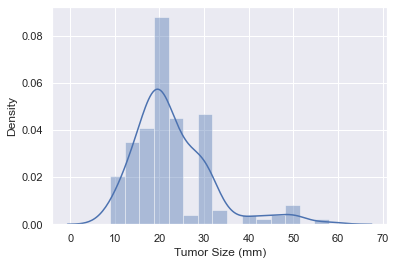

In [10]:
# raw tumor size
sns.distplot(dfclean['size'])
plt.xlabel("Tumor Size (mm)")
plt.show()

Pretty skewed. Although that might be explained by the X variables.

### Relationship between tumor size and gene expression levels

#### Scatterplots
Next, let's examine each of the individual relationships between the tumor size and the 50 gene expression levels. First, we will use the **sns.pairplot()** function to visualize the relationship bewteen the just size variable and the 5 gene expression variables.

If we do not want the **sns.pairplot()** function to visualize a scatterplot for every single pair of numerical variables in a dataframe, then we can use the **x_vars** and the **y_vars** parameters to specify which column names we do want to consider as shown below.


In [11]:
dfclean.columns[0:50]

Index(['X159', 'X960', 'X980', 'X986', 'X1023', 'X1028', 'X1064', 'X1092',
       'X1103', 'X1109', 'X1124', 'X1136', 'X1141', 'X1144', 'X1169', 'X1173',
       'X1179', 'X1193', 'X1203', 'X1206', 'X1208', 'X1219', 'X1232', 'X1264',
       'X1272', 'X1292', 'X1297', 'X1329', 'X1351', 'X1362', 'X1416', 'X1417',
       'X1418', 'X1430', 'X1444', 'X1470', 'X1506', 'X1514', 'X1529', 'X1553',
       'X1563', 'X1574', 'X1595', 'X1597', 'X1609', 'X1616', 'X1637', 'X1656',
       'X1657', 'X1683'],
      dtype='object')

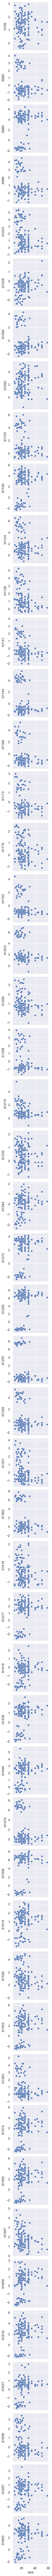

In [12]:
sns.pairplot(
    dfclean,
    x_vars=["size"],
    y_vars=dfclean.columns[0:50],
)
plt.show()

It looks like the relationship between the tumor size and some of these gene expression levels may not be completely linear. Therefore, when we calculate and interpret the correlations between each of these variables below, we should be cautious.

In addition, it looks like there may be some sort of grouping or **clustering** structure of the patients in this dataset. A **clustering algorithm** such as **k-means** might also be useful in exploring the hidden relationships of the gene expression levels and the tumor sizes in this dataset. (**STAT430-Unsupervised Learning** can be useful for learning more about this underlying clustering structure in dataset).


#### Correlations 

Next, let's look at just the correlation between the tumor size and the gene expression levels.

In [13]:
dfclean.corr()

,X159,X960,X980,X986,X1023,X1028,X1064,X1092,X1103,X1109,...,X1574,X1595,X1597,X1609,X1616,X1637,X1656,X1657,X1683,size
X159,1.000000,0.066745,-0.104831,0.025742,0.023293,-0.280436,-0.043324,-0.202610,0.055942,-0.129250,...,-0.072688,-0.066504,0.333983,-0.178051,-0.064006,-0.086649,0.139922,-0.080753,-0.139577,-0.044613
X960,0.066745,1.000000,-0.894160,0.925091,0.870388,-0.641563,0.935203,-0.470886,0.882168,-0.871116,...,-0.848674,-0.853107,0.740220,-0.817977,-0.844117,-0.834558,0.807595,-0.774530,-0.826996,-0.212010
X980,-0.104831,-0.894160,1.000000,-0.833771,-0.767237,0.770950,-0.880199,0.504594,-0.890721,0.950441,...,0.857792,0.864328,-0.728531,0.881564,0.853613,0.840019,-0.849641,0.777174,0.893544,0.244669
X986,0.025742,0.925091,-0.833771,1.000000,0.815923,-0.625476,0.911853,-0.469611,0.845791,-0.790289,...,-0.820038,-0.815907,0.717987,-0.767929,-0.807926,-0.801090,0.733349,-0.768140,-0.784404,-0.244490
X1023,0.023293,0.870388,-0.767237,0.815923,1.000000,-0.609730,0.786784,-0.408869,0.749220,-0.720030,...,-0.798989,-0.797286,0.608442,-0.697912,-0.789011,-0.695183,0.653549,-0.663290,-0.667766,-0.287543
X1028,-0.280436,-0.641563,0.770950,-0.625476,-0.609730,1.000000,-0.610990,0.495474,-0.658699,0.730405,...,0.753340,0.756401,-0.649908,0.730739,0.749460,0.676955,-0.653344,0.651060,0.683719,0.327292
X1064,-0.043324,0.935203,-0.880199,0.911853,0.786784,-0.610990,1.000000,-0.490571,0.878715,-0.855813,...,-0.822937,-0.822922,0.686648,-0.799453,-0.817137,-0.840555,0.783910,-0.789905,-0.832483,-0.182425
X1092,-0.202610,-0.470886,0.504594,-0.469611,-0.408869,0.495474,-0.490571,1.000000,-0.458830,0.406759,...,0.589041,0.587226,-0.427521,0.504697,0.587326,0.448633,-0.461038,0.461783,0.426441,0.201470
X1103,0.055942,0.882168,-0.890721,0.845791,0.749220,-0.658699,0.878715,-0.458830,1.000000,-0.866261,...,-0.763501,-0.767650,0.782595,-0.804683,-0.757206,-0.788661,0.787281,-0.745999,-0.801585,-0.246617
X1109,-0.129250,-0.871116,0.950441,-0.790289,-0.720030,0.730405,-0.855813,0.406759,-0.866261,1.000000,...,0.790526,0.796244,-0.732353,0.830389,0.784011,0.868472,-0.844748,0.738786,0.885713,0.213882


In [14]:
dfclean.corr()['size']

X159    -0.044613
X960    -0.212010
X980     0.244669
X986    -0.244490
X1023   -0.287543
X1028    0.327292
X1064   -0.182425
X1092    0.201470
X1103   -0.246617
X1109    0.213882
X1124   -0.190937
X1136   -0.312942
X1141   -0.294343
X1144   -0.245640
X1169   -0.280702
X1173   -0.233817
X1179   -0.242076
X1193   -0.266954
X1203   -0.265788
X1206   -0.217645
X1208   -0.231898
X1219   -0.297885
X1232   -0.084374
X1264    0.200336
X1272    0.226608
X1292    0.245428
X1297   -0.266409
X1329   -0.259232
X1351   -0.299613
X1362   -0.252061
X1416   -0.232698
X1417    0.243210
X1418    0.180415
X1430    0.278647
X1444    0.247366
X1470   -0.263179
X1506    0.230032
X1514    0.136756
X1529   -0.290717
X1553    0.239752
X1563   -0.293857
X1574    0.256957
X1595    0.254229
X1597   -0.273540
X1609    0.261237
X1616    0.248713
X1637    0.229905
X1656   -0.293103
X1657    0.186372
X1683    0.197666
size     1.000000
Name: size, dtype: float64

When the number of feature variables considered is large, it can be useful to screen variables in advance by computing the individual slopes of each X variable on y or vice versa. There are other possibilities, for example, plotting coefficient t test statistics or sample correlations. Let's plot the correlations. Then we can visualize the relations by graphing slopes versus coefficient number. 

In [15]:
# Compute correlation matrix for screening purposes.
# Extract first column and remove correlation of size with itself.
corrxy = dfclean.corr()['size'][:len(dfclean.columns)-1]
corrxy

X159    -0.044613
X960    -0.212010
X980     0.244669
X986    -0.244490
X1023   -0.287543
X1028    0.327292
X1064   -0.182425
X1092    0.201470
X1103   -0.246617
X1109    0.213882
X1124   -0.190937
X1136   -0.312942
X1141   -0.294343
X1144   -0.245640
X1169   -0.280702
X1173   -0.233817
X1179   -0.242076
X1193   -0.266954
X1203   -0.265788
X1206   -0.217645
X1208   -0.231898
X1219   -0.297885
X1232   -0.084374
X1264    0.200336
X1272    0.226608
X1292    0.245428
X1297   -0.266409
X1329   -0.259232
X1351   -0.299613
X1362   -0.252061
X1416   -0.232698
X1417    0.243210
X1418    0.180415
X1430    0.278647
X1444    0.247366
X1470   -0.263179
X1506    0.230032
X1514    0.136756
X1529   -0.290717
X1553    0.239752
X1563   -0.293857
X1574    0.256957
X1595    0.254229
X1597   -0.273540
X1609    0.261237
X1616    0.248713
X1637    0.229905
X1656   -0.293103
X1657    0.186372
X1683    0.197666
Name: size, dtype: float64

/Users/jdeeke/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


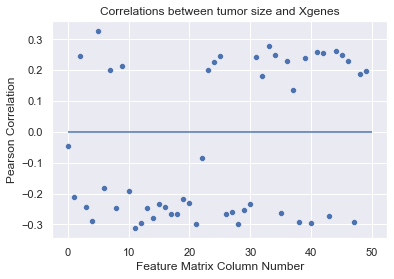

In [16]:
sns.scatterplot(np.arange(np.size(corrxy)), corrxy)
plt.ylabel('Pearson Correlation')
plt.xlabel('Feature Matrix Column Number')
plt.title("Correlations between tumor size and Xgenes")
plt.hlines(y=0, xmin=0, xmax=50)
plt.show()

## A Variable Selection Preprocessing Step 

For ultra high dimensional regression problems, one technique is to screen out variables whose correlations with y fall below a threshold. Here, there might be two variables out of the 50 screened in this way, but otherwise nothing jumps out here. 

The common correlation magnitudes across many genes suggests that they may all be moving more or less together, with no particular genes among this group is dominant in having a strong association with tumor size. Possibly the optimal model would selects a subset of variables that represents the relationship about entire groups of genes.

## Feature and Target Matrices

Using the language of machine learning, the dataset of explanatory variables is commonly called the **feature matrix** and the dataset of the response variable is commonly called the **target array**. Let's extract these two dataframes below first.

In [17]:
# Extract target and feature matrix from dfclean:
y = dfclean['size']
X = dfclean.drop(columns='size')

## More Descriptive Analytics - Quickly Summarizing the Relationship Between the Response Variable and Each of the Explanatory Variables 

Next, it might be useful if we could quickly summarize the relationship between each of the gene expression levels and the tumor size in just one plot. Below is one way that we could do this.


Let's divide up the values of our tumor sizes into bins, as we would for a histogram, and compare each of the gene expression means across those bins.

Let's bin the tumor sizes into 5 groups based on percentiles of the sample distribution, working with the target,

    y = tumor size
    
    
and comparing values in the feature matrix

    X = matrix of gene expression values
    
### Determine the Four Sizes Thresholds that Separate:

We can use the pandas **.quantile()** function to bin the corresponding tumor sizes that are:
* Tumors that are in the bottom 20% of sizes.
* Tumors that are in the 20%-40% of tumor sizes.
* Tumors that are in the 40%-60% of tumor sizes.
* Tumors that are in the 60%-80% of tumor sizes.
* Tumors that are in the top 20% of tumor sizes.


In [18]:
# Compute selected percentiles of log2 tumor size
quants = y.quantile(q=[0.2, 0.40, 0.60, 0.80])
quants

0.2    17.0
0.4    20.0
0.6    22.4
0.8    30.0
Name: size, dtype: float64

### Now let's create a new categorical variable ylevel that labels:
* Tumors that are in the bottom 20% of sizes as 0
* Tumors that are in the 20%-40% of tumor sizes as 1
* Tumors that are in the 40%-60% of tumor sizes as 2
* Tumors that are in the 60%-80% of tumor sizes as 3
* Tumors that are in the top 20% of tumor sizes as 4.

To do this we will first create a pandas series 'ylevel' that is comprised of all 0's and has the same dimensions as our pandas series y. 

In [19]:
ylevel = y*0
ylevel

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
150    0.0
151    0.0
152    0.0
153    0.0
154    0.0
Name: size, Length: 150, dtype: float64

In [20]:
level = 0
for cut in quants:
    print('Cut Threshold: ',cut)
    level = level + 1
    
    #For each response variable value that is greater than or equal to that particular cut, set the value to be that levl
    ylevel[y >= cut] = level

df_size_levels=pd.DataFrame({'y': y, 'ylevel': ylevel})
df_size_levels

Cut Threshold:  17.0
Cut Threshold:  20.0
Cut Threshold:  22.39999999999999
Cut Threshold:  30.0


,y,ylevel
0,13.0,0.0
1,15.0,0.0
2,15.0,0.0
3,20.0,2.0
4,10.0,0.0
...,...,...
150,20.0,2.0
151,30.0,4.0
152,15.0,0.0
153,20.0,2.0


/Users/jdeeke/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


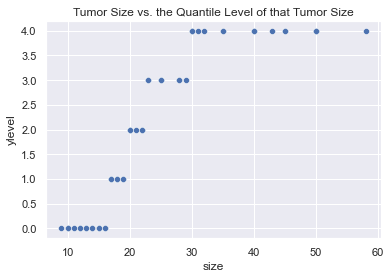

In [21]:
sns.scatterplot(y, ylevel)
plt.ylabel('ylevel')
plt.title('Tumor Size vs. the Quantile Level of that Tumor Size')
plt.show()

### Find the average feature size for each tumor size category.

In [22]:
df['ylevel']=ylevel

df.head()

,X159,X960,X980,X986,X1023,X1028,X1064,X1092,X1103,X1109,...,X1595,X1597,X1609,X1616,X1637,X1656,X1657,X1683,size,ylevel
0,0.739512,1.971036,-1.660842,2.777183,3.299062,-1.954834,2.784970,0.411848,3.974931,-0.979751,...,-2.036134,3.114202,-1.567229,-2.100264,-2.067843,2.116261,-2.057195,-0.868534,13.0,0.0
1,2.037903,2.197854,-1.263034,4.082346,5.426886,-1.732520,3.085890,0.688056,4.503384,-1.185032,...,0.127756,2.772590,-1.451107,0.267480,-1.526069,2.643856,-1.625604,-1.415037,15.0,0.0
2,2.218338,3.471559,-1.789433,2.829994,4.746466,-2.222392,2.977280,0.944858,4.021099,-1.825502,...,-2.347923,3.577213,-2.175087,-2.084889,-2.106915,2.738768,-1.387816,-0.780555,15.0,0.0
3,0.972344,2.638734,-2.010999,3.913935,4.744161,-2.496426,3.139577,0.155651,4.632121,-1.671513,...,-2.216318,3.168707,-1.844349,-2.010999,-1.996352,2.797407,-1.743066,-1.010999,20.0,2.0
4,2.412235,4.033491,-1.536501,4.239650,4.304348,-1.991067,3.700095,0.878536,4.295705,-2.141092,...,-2.448274,3.717911,-2.286523,-2.045515,-1.776328,2.813104,-2.353637,-1.687061,10.0,0.0


In [23]:
mean_levels=df.drop(['size'], axis=1).groupby(['ylevel']).mean()
mean_levels

,X159,X960,X980,X986,X1023,X1028,X1064,X1092,X1103,X1109,...,X1563,X1574,X1595,X1597,X1609,X1616,X1637,X1656,X1657,X1683
ylevel,,,,,,,,,,,,,,,,,,,,,
0.0,1.504755,0.612521,2.233018,1.404236,2.239300,-1.066753,0.391509,1.660575,1.830215,1.801973,...,1.672344,0.800502,0.889081,2.250868,-0.166661,0.988410,-0.248163,0.949323,-0.254472,1.470649
1.0,1.126742,0.203442,3.126544,1.076623,1.872226,-0.551960,0.072738,1.989218,1.249245,2.593302,...,1.008366,1.509674,1.564749,1.778669,0.436287,1.615821,0.178895,0.446196,0.095233,2.072589
2.0,1.344909,-0.311217,3.787881,0.595172,1.138927,-0.618690,-0.639796,2.202338,0.805685,3.369223,...,0.642708,2.161977,2.219290,1.638596,0.753883,2.248987,0.542453,0.189345,0.627823,2.677923
3.0,1.448158,-0.314860,3.774694,0.509667,1.002144,-0.410417,-0.542063,2.542014,0.839154,3.112167,...,0.603712,2.371073,2.429896,1.692622,0.766983,2.444457,0.545823,-0.096127,0.406184,2.714755
4.0,1.397943,-0.515673,4.197393,0.350807,0.689921,-0.337765,-0.682360,2.675173,0.427064,3.387439,...,0.262969,2.463948,2.528190,1.455484,0.972261,2.538903,0.639784,-0.190559,0.610993,2.711134


### Plot in a binned heatmap.

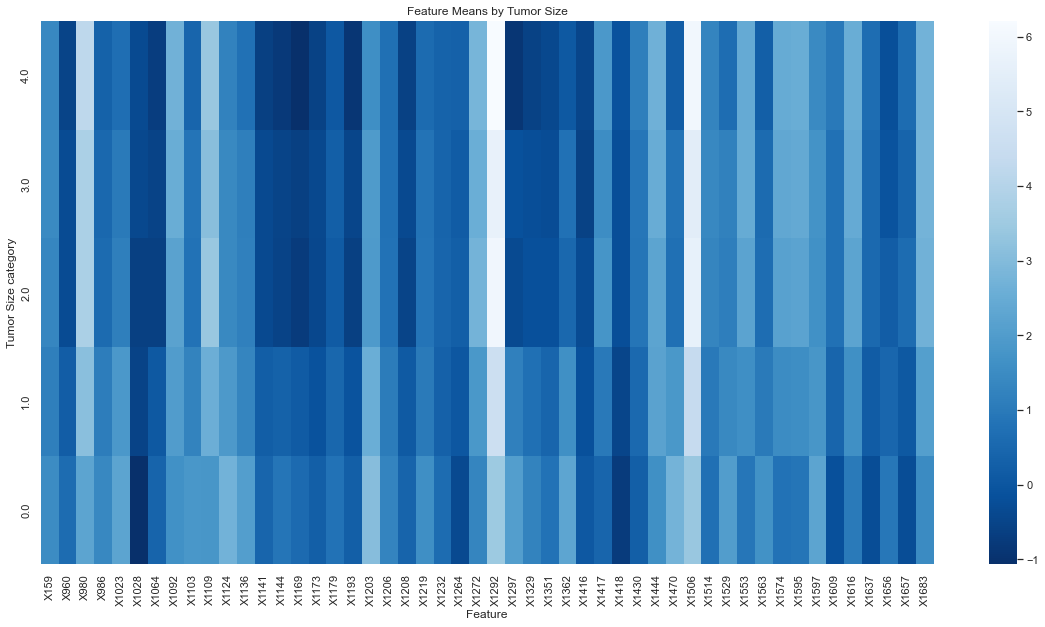

In [24]:
plt.figure(figsize=(20,10))
fig = sns.heatmap(mean_levels, annot=False, linewidths=0, 
            square = False, cmap = 'Blues_r');
fig.set_ylim([0,5]);
plt.ylabel('Tumor Size category');
plt.xlabel('Feature');
all_sample_title = 'Feature Means by Tumor Size'
plt.title(all_sample_title, size = 12);
plt.show(fig)

In the heat map we look for trends in intensity of the colors across different tumor size categories. 

### Pick out a few features and visualize the relationship between this feature and the numerical response variable (size).

Below is the scatterplots of y versus a couple of the X variables (columns 12 and 49). The least squares lines are included in the plots.

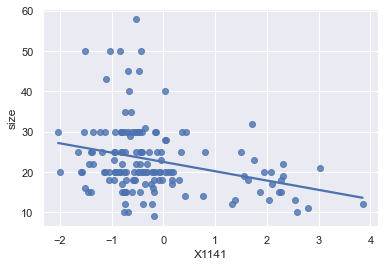

In [25]:
sns.regplot(x=X.iloc[:,12], y=y, ci=False)
plt.show()

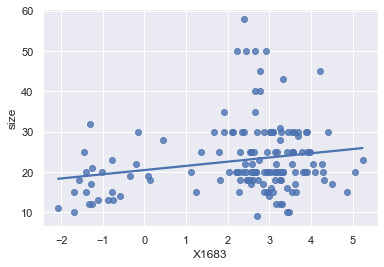

In [26]:
sns.regplot(x=X.iloc[:,49], y=y, ci=False)
plt.show()

## Comparing Non-Regularized Linear Regression and Lasso Linear Regression using a single Training and Test Dataset

Next, we would like to fit two linear regression models. Each of these linear regression models will predict the tumor size, using each of the 50 gene expression levels with a **training dataset**. Let's set up and compare the slopes for the following linear regression models.
1. Non-regularized linear regression
2. LASSO linear regression

### Creating a Training Feature Matrix, a Training Target Array, a Test Feature Matrix, and a Test Target Array

We will use the **sklearn.linear_model** package along with the **LinearRegression()** and **Lasso()** functions to model our non-regularized linear regression models and lasso linear regression models respectively. Like with the **LogisticRegression()** function that we used from this package, these **LinearRegression()** and **Lasso()** functions requires a feature matrix and a target array as the input separately.

In addition, we would also like to train each of these linear regression models, not with the full dataset this time, but with a training dataset that is comprised of a random sample of 90% of the observations. Thus, we can use the **train_test_split()** function from the **sklearn.linear_model** package to create these corresponding dataframes:
* training feature matrix
* training target array
* test feature matrix
* test target array.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [29]:
X_train

,X159,X960,X980,X986,X1023,X1028,X1064,X1092,X1103,X1109,...,X1563,X1574,X1595,X1597,X1609,X1616,X1637,X1656,X1657,X1683
57,0.967334,-0.267347,4.485619,0.007160,2.906412,-0.869692,-1.036342,2.170722,0.143364,4.388553,...,0.169127,2.144988,2.165932,1.206929,0.136851,2.183419,0.864648,-0.685267,0.488500,2.972830
107,-0.227177,-0.746552,4.718697,0.426931,1.472402,0.145300,-0.565979,3.800514,0.229201,4.815521,...,-0.261125,2.292977,2.372620,0.849058,0.607085,2.372620,0.971049,-0.880853,0.656413,4.288094
71,1.830426,-1.098734,4.763800,-0.250737,0.208695,-0.825715,-0.972202,3.058445,-0.369000,3.134566,...,0.184200,3.642733,3.715475,1.558525,1.740890,3.690474,0.390980,-0.729500,0.194048,2.785538
56,2.032421,-1.137504,4.639839,0.053018,0.045563,0.067815,-0.765535,2.680721,1.078814,2.890858,...,-0.524527,2.972742,3.087917,1.984487,1.630525,3.071491,0.944959,-0.417611,1.089730,2.645398
136,1.845373,-0.787271,4.511494,0.557741,1.081900,-0.401617,-1.171611,1.955501,0.230077,4.704324,...,0.159400,2.244375,2.300192,1.684798,0.676386,2.317877,0.443408,-0.947051,0.972779,3.779152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1.902578,-0.365649,4.126204,0.351763,1.409644,-0.171271,-0.818162,3.208871,-0.032666,3.143364,...,0.668620,0.627398,0.852774,1.637814,1.000000,0.852774,0.876425,0.264828,0.123735,2.555963
109,0.687676,-0.525628,4.826888,0.306427,1.059334,-0.404066,-1.150780,4.276053,0.021859,4.194794,...,0.043393,2.386537,2.384430,2.032666,1.711411,2.403289,1.247348,-0.607158,1.319724,3.916404
14,1.471072,3.086622,-2.028855,3.811939,4.755416,-2.300659,3.171115,0.661461,5.287507,-2.166358,...,3.584367,-2.448758,-2.429393,4.327630,-1.825321,-2.058299,-1.775568,2.989697,-2.410284,0.136204
95,1.813748,-0.432586,4.392673,0.539400,-0.076757,-0.133025,-1.383004,3.989450,-0.022601,3.091853,...,0.350057,2.289422,2.252249,1.271729,1.205204,2.277908,0.489692,0.155736,1.088781,2.447147


In [30]:
X_test

,X159,X960,X980,X986,X1023,X1028,X1064,X1092,X1103,X1109,...,X1563,X1574,X1595,X1597,X1609,X1616,X1637,X1656,X1657,X1683
75,1.652077,-0.514573,4.991603,0.089886,0.734903,-0.321928,-0.621488,2.797013,0.842261,2.908264,...,-0.334867,4.117458,4.183600,1.183600,1.507342,4.163039,0.564204,0.183600,-0.258918,2.940838
18,2.074001,2.862090,-1.460336,2.664106,3.716482,-1.967820,2.086825,0.631218,4.535928,-0.070389,...,3.573163,-2.197301,-2.265206,3.330939,-2.300395,-2.180813,-2.055282,2.909540,-2.373458,-0.584963
121,1.783376,-0.730813,4.756599,-0.378512,0.072150,-0.490986,-1.612977,3.449307,0.307055,2.734189,...,1.723026,4.921917,4.917946,2.597241,0.971986,4.882957,0.849024,0.206451,0.894507,3.152350
80,1.587740,-1.205810,4.054216,-0.140007,-0.653269,-0.457348,-0.975197,2.792988,0.286471,3.259730,...,-0.042311,4.224922,4.252747,2.387146,1.472262,4.198821,0.620654,-0.347165,-0.196223,3.127614
78,1.032180,3.275634,-1.300395,4.508867,3.856110,-1.470320,2.306661,2.641685,4.944718,-1.148392,...,3.871014,-1.411426,-1.327362,3.368884,-1.563429,-0.925999,-0.629018,2.204461,0.284568,-1.411426
32,1.210634,-0.643515,4.474013,0.810474,0.506353,-0.713477,-0.276210,0.259387,0.595851,3.873351,...,0.174774,1.201159,1.347923,1.686925,0.909802,1.279786,0.889297,-0.678072,0.969626,3.014950
66,1.062931,0.612270,5.307150,0.213174,1.297836,0.594123,-0.196589,3.449372,-0.294621,3.557128,...,0.036296,3.006875,3.031809,1.193219,0.905052,2.987309,0.606246,-0.037233,0.259968,2.659576
146,1.267480,-0.075407,4.334232,-0.185032,-0.279154,0.096862,-0.872244,3.607604,0.488286,3.175111,...,-0.812373,4.168068,4.191653,1.275780,1.016602,4.233087,-0.140178,0.539733,0.993305,2.228106
70,1.524568,-1.071161,4.779535,-0.318076,0.273285,-0.546894,-1.243114,2.547183,0.082462,3.094254,...,-0.347222,3.169925,3.362249,2.254005,0.612977,3.333454,0.551138,-0.318076,1.500229,3.550479
84,0.703225,-1.351222,6.454067,-0.791135,0.772766,0.413224,-1.097466,3.007232,0.471900,4.177958,...,0.282239,4.822038,4.838095,1.770643,1.456133,4.972323,1.104842,-1.193681,1.550727,2.623119


In [31]:
y_train

57     20.0
107    20.0
71     40.0
56     35.0
136    25.0
       ... 
73     17.0
109    30.0
14     18.0
95     20.0
105    18.0
Name: size, Length: 135, dtype: float64

In [32]:
y_test

75     25.0
18     14.0
121    22.0
80     25.0
78     20.0
32     30.0
66     50.0
146    20.0
70     15.0
84     25.0
113    18.0
12     21.0
37     18.0
9      17.0
19     13.0
Name: size, dtype: float64

### Train the Non-Regularized Linear Regression

Next, let's train the non-regularized linear regression model with just the training data. To perform non-regularized linear regression, we use the **LinearRegression()** function. No additional parameters are required for this function.

In [33]:
clf0 = LinearRegression()
clf0.fit(X_train, y_train)

LinearRegression()

Here are all of the feature coefficient estimates:

In [34]:
pd.DataFrame(clf0.coef_.T, columns = ['non_reg_linear'], index=X_train.columns)

,non_reg_linear
X159,1.860688
X960,7.197889
X980,-5.483316
X986,-0.996936
X1023,-2.768050
X1028,5.217861
X1064,1.734583
X1092,-0.336899
X1103,1.511997
X1109,0.293528


... and the intercept:

In [35]:
clf0.intercept_

35.304938233261986

### Train the LASSO Linear Regression

Next, let's train the LASSO linear regression model with just the training data. To perform LASSO linear regression, we use the **Lasso()** function. No additional parameters are required for this function.
* $\lambda=0.3$
    - Note: With this Lasso() function, the $\alpha$ parameter actually equals the $\lambda$ parameter that we defined in the slides
* max_iter=1000 = maximum number of iterations that the solver (Coordinate Descent Algorithm) will use if it doesn't converge.

In [36]:
clf1 = Lasso(alpha=0.3, max_iter=1000)
clf1.fit(X_train, y_train)

Lasso(alpha=0.3)

In [37]:
pd.DataFrame(clf1.coef_.T, columns = ['lasso_linear'], index=X_train.columns)

,lasso_linear
X159,0.000000
X960,0.901501
X980,-0.401145
X986,-0.000000
X1023,-1.167591
X1028,1.992447
X1064,0.476193
X1092,0.000000
X1103,0.000000
X1109,-0.887398


### Let's Compare the Coefficients from the Two Models

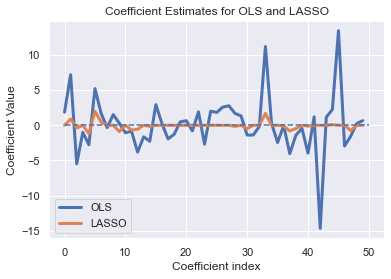

In [38]:
lw=3
plt.plot(np.arange(np.size(clf0.coef_)), clf0.coef_, lw=lw)
plt.plot(np.arange(np.size(clf1.coef_)), clf1.coef_, lw=lw)
#plt.xticks(np.arange(0,20,1))
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Estimates for OLS and LASSO')
plt.legend(['OLS','LASSO'], loc='lower left')
plt.hlines(y=0, xmin=0, xmax=50, linestyles='--')
plt.show()

In [39]:
pd.DataFrame({'non_reg_linear':clf0.coef_, 'lasso_linear': clf1.coef_}, index=X_train.columns)

,non_reg_linear,lasso_linear
X159,1.860688,0.000000
X960,7.197889,0.901501
X980,-5.483316,-0.401145
X986,-0.996936,-0.000000
X1023,-2.768050,-1.167591
X1028,5.217861,1.992447
X1064,1.734583,0.476193
X1092,-0.336899,0.000000
X1103,1.511997,0.000000
X1109,0.293528,-0.887398


We see that the non-regularized linear regression coefficient estimates are highly variable compared to the Lasso estimates. In addiition, the Lasso estimator zeroes out some of the coefficients. In other words, it has a variable selection property that can reduce the complexity of the trained model compared to ordinary least squares regression.

### Next, let's test data predictions and performance scores of the two models

Having trained both model classes, we evaluate the relative performance using the .predict and .score methods. First, we copute the test data predictions based on the trained model.

In [40]:
yhat0 = clf0.predict(X_test)
yhat1 = clf1.predict(X_test)

**How do these predictions *each individually* compare to the actual test values for y? Let's look at the scatter plots of actual versus predicted.**

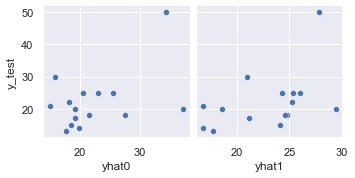

In [41]:
sns.pairplot(data=
            pd.DataFrame({'y_test': y_test, 
                          'yhat0': yhat0, 
                          'yhat1': yhat1}), 
            y_vars='y_test', x_vars=['yhat0', 'yhat1'])
plt.show()

Compare $R^2$

Performance scores based on test data R-squared (proportion of variance explained) are computed using the .score(X,y) method. For further details see the documentation of sklearn.linear_model modules LinearRegression and Lasso.

In [42]:
print("Test R-square for OLS: ", clf0.score(X_test, y_test))
print("Test R-square for Lasso: ", clf1.score(X_test, y_test))

Test R-square for OLS:  0.1204157335536663
Test R-square for Lasso:  0.19483080965860788


Both are pretty low, but we see that the Lasso has substantially outperformed OLS based on the test R-square scores.

### Importance of using an independent test set: a cautionary tale

It is instructive to compare the R-square values we would have gotten based on the training data.

"Naive" $R^2$ for OLS (ie. Using the Training Dataset $R^2$ for Evaluating Predictive Power)

In [43]:
round(clf0.score(X_train, y_train), 3)

0.416

"Naive" $R^2$ for Lasso  (ie. Using the Training Dataset $R^2$ for Evaluating Predictive Power)

In [44]:
round(clf1.score(X_train, y_train), 3)

0.219

**Conclusion:** If we had relied on these in-sample evaluations alone, then OLS would have *appeared* to be much better than the Lasso, and *seemed* to explain over 41% of the variance in tumor size. Thus, we would have fooled ourselves badly!

## Cross-Validation Analysis

In order to give every observation the chance to be in a test dataset at least once, we will use k-fold cross validation to compare the performance of the non-regularized linear regression model and the LASSO linear regression model. Specifically, we will use $k=5$ folds in this analysis.

The **cross_val_score()** function from the **sklearn.model_selection** package will automatically do the following for us:
1. Split the dataset into k approximately equally sized folds.
2. Trains the model with each of the k training datasets created.
3. Tests the model with each of the k corresponding test datasets created.
4. After all the k fitted models has been tested, the function returns the **negative mean squared error** for each of the $k$ corresponding test datasets.
\begin{equation}
-MSE_{test} = -{1\over n_{test}} \sum_{i=1}^{n_{test}} (y_{test,i} - \hat{y}_{test,i} )^2
\end{equation}

With this result we can take the average of these k **$-MSE_{test}$** values to calculate the average performance of the given model.


### Non-Regularized Linear Regression

Below we find that the average MSE of the $k=5$ test dataset for the non-regularized linear regression model was 127.91.

In [45]:
from sklearn.model_selection import cross_val_score
modclass0 = LinearRegression()
scores0 = cross_val_score(modclass0, X, y, cv=5, 
                          scoring="neg_mean_squared_error")
print("CV MSE scores:", -scores0)
print("Average MSE:", round(-scores0.mean(), 2))
print("Std. error:", round(scores0.std()/np.sqrt(len(scores0)), 2))

CV MSE scores: [224.87305851 125.45118196 117.67760614  79.61891434  91.90508918]
Average MSE: 127.91
Std. error: 22.93


### LASSO Linear Regression

Below we find that the average MSE of the $k=5$ test dataset for the LASSO linear regression model was 80.98.

In [46]:
modclass1 = Lasso(alpha=0.3, max_iter=1000)
scores1 = cross_val_score(modclass1, X, y, cv=5, 
                          scoring="neg_mean_squared_error")
print("CV MSE scores:", -scores1)
print("Average MSE:", round(-scores1.mean(), 2))
print("Std. error:", round(scores1.std()/np.sqrt(len(scores1)), 2))

CV MSE scores: [ 52.00450159 105.81602909 104.74790139  72.53890058  69.78054464]
Average MSE: 80.98
Std. error: 9.42


### Conclusion

We see that LASSO LINEAR regression has much better predictive accuracy in this example than the non-regularized linear regression model.

### Estimated predictive accuracy

The average test MSE gives us a rough idea of how close the model predictions are expected to be to the actual values. For the Lasso, the estimated MSE was 81.0, which translates to a standard deviation for prediction of 9.0. We would therefore predict with approximate 95% confidence that the actual tumor size measurement would be within +/- 18.0 mm of the predicted value based on the gene expression measurements.

Comparing to the marginal distribution of tunor sizes above, this seems only a small gain in precision using these 50 gene expression values. It is unclear that tumor size is associated with these gene expressions. 

## Selecting the Value of $\lambda$ in LASSO

To use a regularization method like the Lasso, we need to set the value of the tuning parameter that determines how much weight to give to the penalty function in fitting the model. how much impact does this have?

**Example:** Let's experiment with different values for $\lambda$ in the breast cancer example, using gene expression features to predict tumor size.

### Fit the models

First, let's fit multiple LASSO models using different values of $\lambda$.

In [47]:
# Several settings for alpha
mod000 = LinearRegression()
mod025 = Lasso(alpha=0.25, max_iter=1000)
mod050 = Lasso(alpha=0.50, max_iter=1000)
mod075 = Lasso(alpha=0.75, max_iter=1000)
mod100 = Lasso(alpha=1.00, max_iter=1000)
mod300 = Lasso(alpha=3.00, max_iter=1000)

In [48]:
# Fit the models
mod000.fit(X, y)
mod025.fit(X, y)
mod050.fit(X, y)
mod075.fit(X, y)
mod100.fit(X, y)
mod300.fit(X, y)

Lasso(alpha=3.0)

### Comparison

Let's compare the Number of Non-Zero Coefficients for each of these fitted models.

In [49]:
# compare numbers of nonzero coefficients
tol = 10**(-6)
perf_table = pd.DataFrame({
    'alpha': [0.00, 0.25, 0.50, 0.75, 1.00, 3.00],
    'nonzero_coefs': [
        np.sum(np.abs(mod000.coef_) > tol),
        np.sum(np.abs(mod025.coef_) > tol),
        np.sum(np.abs(mod050.coef_) > tol),
        np.sum(np.abs(mod075.coef_) > tol),
        np.sum(np.abs(mod100.coef_) > tol),
        np.sum(np.abs(mod300.coef_) > tol)]
    })
perf_table

,alpha,nonzero_coefs
0,0.00,50
1,0.25,18
2,0.50,12
3,0.75,6
4,1.00,7
5,3.00,1


**Is this what we would expect?**

### Perform 5-fold Cross Validation of Each Model and Compare

Let's perform 5-fold cross validation of each of these models and compare the average MSE of the 5 test dataset from each of these models.

In [50]:
# Compare cv scores
k=5
perf_table['MSE'] = [
    -cross_val_score(mod000, X, y, cv=k, scoring="neg_mean_squared_error").mean(),
    -cross_val_score(mod025, X, y, cv=k, scoring="neg_mean_squared_error").mean(),
    -cross_val_score(mod050, X, y, cv=k, scoring="neg_mean_squared_error").mean(),
    -cross_val_score(mod075, X, y, cv=k, scoring="neg_mean_squared_error").mean(),
    -cross_val_score(mod100, X, y, cv=k, scoring="neg_mean_squared_error").mean(),
    -cross_val_score(mod300, X, y, cv=k, scoring="neg_mean_squared_error").mean()]
perf_table['RMSE'] = np.sqrt(np.abs(perf_table['MSE']))
perf_table

,alpha,nonzero_coefs,MSE,RMSE
0,0.00,50,127.905170,11.309517
1,0.25,18,81.034117,9.001895
2,0.50,12,80.747123,8.985940
3,0.75,6,78.908112,8.883024
4,1.00,7,78.369937,8.852680
5,3.00,1,79.173781,8.897965


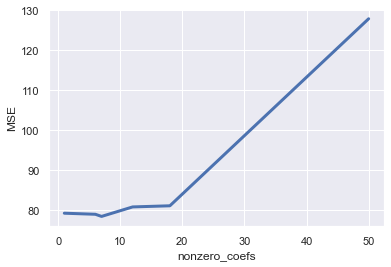

In [51]:
sns.lineplot(x='nonzero_coefs', y='MSE', data=perf_table, lw=3)
plt.show()

What does this mean?

**Remarks:**

+ The penalty tuning parameter alpha has a big effect on the sparsity of the model; larger values of alpha place greater constraints on how many coefficients can be nonzero.


+ Among these choices, alpha = 1.00, with 7 nonzero variables gives the smallest value for cross-validated mean-square-error.


+ The differences on MSE are relatively small, as the root-mean-square error values range only from 8.9 to 9.0. Even the one-variable model does almost as well as the 18 variable model.


+ All of the sparse Lasso fits improve on the OLS fit with 50 variables.



## Automatic Parameter Tuning for LASSO

The **LassoCV()** function provides a tool for using cross-validation to compare performance across a range of values for the tuning parameter $\gamma$. The code here is adapted from code in the documentation for LassoCV.

Using this function below, we automatically try out the following values of $\gamma$ in the LASSO linear regression model: 0.25, 0.50, 0.75, 1, 2, 3, 5, and 10, using 5-fold cross validation.

In [52]:
from sklearn.linear_model import LassoCV
model = LassoCV(cv=5, alphas=[0.25, 0.50, 0.75, 1.00, 2.00, 3.00, 5, 10]).fit(X, y)

model

LassoCV(alphas=[0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 5, 10], cv=5)

In [53]:
model.alphas_

array([10.  ,  5.  ,  3.  ,  2.  ,  1.  ,  0.75,  0.5 ,  0.25])

In [54]:
pd.DataFrame(model.mse_path_, index=model.alphas_, columns=['test_fold_%s_avg_MSE'%(str(i)) for i in range(1,6)])

,test_fold_1_avg_MSE,test_fold_2_avg_MSE,test_fold_3_avg_MSE,test_fold_4_avg_MSE,test_fold_5_avg_MSE
10.00,67.365625,82.228958,117.933333,74.850000,60.342500
5.00,67.365625,82.003717,114.438824,74.434986,59.821110
3.00,67.365625,82.141190,111.999843,74.529572,59.832677
2.00,67.365625,83.651007,110.887078,74.824178,60.066261
1.00,57.687258,89.637655,108.114968,74.811516,61.597687
0.75,60.193665,90.998073,106.865448,73.685921,62.801796
0.50,66.513379,94.457836,103.851655,73.327269,65.615000
0.25,48.226059,109.744121,105.332595,70.760787,71.129785


Let's display the cross-validation average MSE for each of these LASSO linear regression models below.

(-0.23750000000000004, 10.4875, 44.74069525897193, 121.41869705116007)

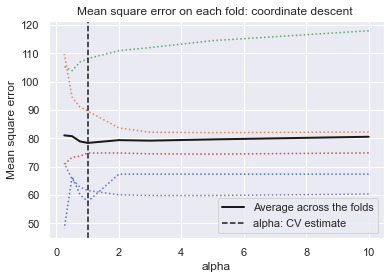

In [55]:
# Display results
plt.figure()

#Plot the MSE for each value of lambda (there are five "folds" (ie. pairs of training/test data))
plt.plot(model.alphas_, model.mse_path_, ':')

#Plot the average MSE for each value of lambda (across all five folds)
plt.plot(model.alphas_, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)

#Plot a vertical line for the alpha that produces the minimum average MSE (across all the folds)
plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha: CV estimate')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')

What do you observe?

**Conclusion:** The optimum value is estimated to be near $\gamma =\alpha = 1$. We can also see that the train/test MSE paths for each "fold", that is for each of the 5 train/test splits of the data. The large variation between optimal alpha values between different folds suggests that the best alpha is highly variable. We can't put too much confidence in the best value for these data. Conversely, this means that the choice of alpha is not critical within the range considered.

Displaying the results of the final model

Given that this value of $\alpha=\gamma=1$ had the lowest average MSE, the model chooses LASSO linear regression with $\alpha=\gamma=1$ as the **final model**.

In [56]:
model.alpha_

1.0

We can extract the slopes of the final LASSO model using the **.coef_** attribute as shown below.

In [57]:
model.coef_

array([-0.        ,  0.        ,  0.        , -0.        , -0.4449253 ,
        0.08993896,  0.        ,  0.00678522, -0.        , -0.        ,
        0.        , -0.41695898, -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.18317027, -0.        , -0.05873826, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.21900174,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ])

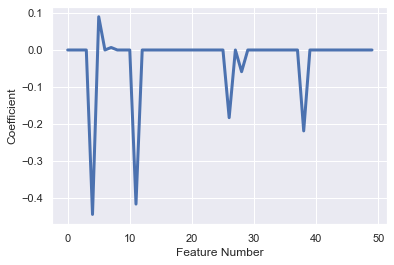

In [58]:
plt.plot(np.arange(np.size(model.coef_)), model.coef_, lw=lw)
plt.xlabel('Feature Number')
plt.ylabel('Coefficient')
plt.show()

In [59]:
# Which gene expressions had nonzero coefficients?
tol = 10**(-8)
X.columns[abs(model.coef_)>tol]

Index(['X1023', 'X1028', 'X1092', 'X1136', 'X1297', 'X1351', 'X1529'], dtype='object')

#### References

Chanrion, M. et al. "A Gene Expression Signature that Can Predict the Recurrence of Tamoxifen-Treated Primary Breast Cancer." *Clin. Cancer. Res.* 2008;14(6)March15, 2008

---
STAT 207, Julie Deeke, Victoria Ellison, and Douglas Simpson, University of Illinois at Urbana-Champaign